# Linear Algebra
## Ch03 - Vector Multiplication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Dot product
It's one of the most important operations in Linear Algebra. The **dot product** is a single number that represents the relationship between two vectors. For this reason, is also sometimes called the "scalar-product".

Notation:
$$\large
\alpha =a\cdot b=\langle a,b\rangle =a^{T} b=\sum _{i=1}^{n} a_{i} b_{i}
$$


In [2]:
# dot product
v1 = np.array([2, 5, 4, 7])
v2 = np.array([4, 1, 0, 2])
np.dot(v1, v2)

27

In [3]:
v3 = v1*v2
v3

array([ 8,  5,  0, 14])

In [4]:
# Four ways to implement dot product
v1 = np.array([1, 2, 3, 4, 5])
v2 = np.array([0, -4, -3, 6, 5])

# Method 1
dp1 = sum(np.multiply(v1, v2))

# Method 2 (Recommended)
dp2 = np.dot(v1, v2)

# Method 3
dp3 = np.matmul(v1, v2)

# Method 4
dp4 = v1 @ v2

# Method 5
dp5 = 0
for i in range(len(v1)):
    dp5 += v1[i] * v2[i]
    
print(dp1, dp2, dp3, dp4, dp5)

32 32 32 32 32


### Distributive property of dot product

$$\large
w^{T}( u+v) \ =\ w^{T} u\ +\ w^{T} v
$$

The dot product is defined as the sum of element-wise multiplications. Common terms can be combined across sums, which brings us to the following:

$$\large
\sum _{i=1}^{n} w_{i}( u_{i} +v_{i}) \ =\ \sum _{i=1}^{n} w_{i} u_{i} \ +\ \sum _{i=1}^{n} w_{i} v_{i}
$$


In [5]:
# Three distinct vectors
u = np.array([1, 2])
v = np.array([1, 3])
w = np.array([2, 3])

# Distributive property of dot product
print(np.dot(w.T, (u+v)))
print(np.dot(w.T, u) + np.dot(w.T, v))

19
19


Example of applying the distributive property of the dot product between a vector and itself:

$$\large
( u+v)^{T}( u+v) \ =\ \| u+v\| ^{2} \ =\ u^{T} u\ +\ 2u^{T} v\ +\ v^{T} v\ =\ \| u\| ^{2} \ +\ \| v\| ^{2} \ +\ 2u^{T} v
$$

In [6]:
# Distributive property to the dot product between a vector and itself
np.dot((u+v).T, (u+v))

29

### Associative property of dot product
The dot product ___is not___ associative.

$$\large
 \begin{array}{l}
a( b\cdot c) \ =\ ( a\cdot b) c\\
\\
a^{T}\left( b^{T} c\right) \neq \left( a^{T} b\right)^{T} c\\
\\
\text{because:} \ \\
b^{T} c\ \neq a^{T} b
\end{array}
$$

In [7]:
# Associative property
a = np.array([1, 2])
b = np.array([1, 3])
c = np.array([2, 3])

# Compute associative property
dp1 = np.dot(a.T, np.dot(b.T, c))
dp2 = np.dot(np.dot(a.T, b).T, c)
print(dp1, dp2)

[11 22] [14 21]


## Is the dot product commutative?
$$\large
a^{T} b = b^{T} a
$$

However, matrix multiplication **is NOT commutative!**

1. Generate two 100-element random row vectors, compute dot product $a$ with $b$, $b$ with $a$
2. Generate two 2-element integer row vectors, repeat

In [8]:
# 1.Generate two 100-element random row vectors, compute dot product a with b, b with a
a = np.random.randn(100)
b = np.random.randn(100)

ab_dot = np.dot(a, b)
ba_dot = np.dot(b, a)

print(ab_dot == ba_dot)

True


In [9]:
# 2. Generate two 2-element integer row vectors, repeat
a = np.array([1, 2])
b = np.array([3, 4])

ab_dot = np.dot(a, b)
ba_dot = np.dot(b, a)

print(ab_dot == ba_dot, '\n')
print(np.dot(a, b), np.dot(b, a))

True 

11 11


## Vector lenght (a.k.a. magnitude or norm)
$$\large
\| v\| =\sqrt{v^{T} v}
$$

To compute the lenght of a vector, take the square root of the dot product of the vector with itself.

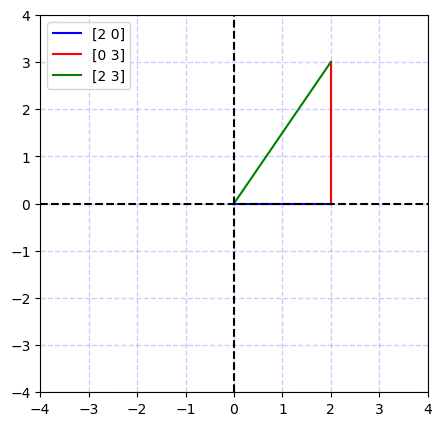

In [10]:
# Plot axis
def plot_axis(vector_list, ax=3):
    plt.plot([-ax, ax],[0, 0],'k--')
    plt.plot([0, 0],[-ax, ax],'k--')
    plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
    plt.legend(loc='upper left')
    plt.axis([-ax,ax,-ax,ax]);

# Two vectors in R2
v1 = np.array([2, 0])
v2 = np.array([0, 3])
v3 = v1 + v2

# Plot vectors
plt.figure(figsize=(5,5), dpi=100)
plt.plot([0, v1[0]],[0, v1[1]],'b',label=v1)
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label=v2)
plt.plot([0, v3[0]],[0, v3[1]],'g',label=v3)

plot_axis(vector_list=[v1,v2,v3], ax=4)
plt.show()

Example:

$$\large
 \begin{array}{l}
v=\begin{bmatrix}
2\\
3
\end{bmatrix}\\
\\
\| v\| ^{2} =( v_{1})^{2} +( v_{2})^{2}\\
\\
\| v\| ^{2} =4+9=13\\
\\
\| v\| =\sqrt{13}\\
\\
\| v\| =\sqrt{v^{T} v} =\sqrt{2\times 2+3\times 3} =\sqrt{13}
\end{array}
$$

In [11]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])

# methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt(sum(np.multiply(v1,v1)))

# method 5: take the norm
vl2 = np.linalg.norm(v1)

print(np.round(vl1, 2), np.round(vl2, 2))

9.54 9.54


### Linear weighted combination

It's a scalar-vector multiplication and addition.

$$\large
w = \lambda _{1} v_{1} + \lambda _{2} v_{2} + \lambda _{3} v_{3} + ... + \lambda _{n} v_{n}
$$

In [12]:
# Define scalars and vectors
l1 = 1
l2 = 2
l3 = -3
v1 = np.array([4, 5, 1])
v2 = np.array([-4, 0, -4])
v3 = np.array([1, 3, 2])

# Linear weighted combination
l1*v1 + l2*v2 + l3*v3

array([ -7,  -4, -13])

## Outer product
Combining two vectors to produce a matrix. The two vectors don't need to have the same size. The result is a $M\times N$ matrix.

**Dot product:**

$\large v^{T}w = 1\times 1$


**Outer product:**

$\large vw^{T} = M\times N$

This notation indicates that the dot product $(v^{T}w)$ is a $1\times 1$ array (just a single number; a scalar) whereas the outer product $(vw^{T})$ is a matrix whose sizes are defined by the number of elements in the vectors.

### The outer product formula
$$\large
(vw^T)_{ij} = v_i w_j
$$

Example:

$$\large
\begin{bmatrix}
a\\
b\\
c
\end{bmatrix}\begin{bmatrix}
d & e & f
\end{bmatrix} =\begin{bmatrix}
ad & ae & af\\
bd & be & bf\\
cd & ce & cf
\end{bmatrix}
$$

In [13]:
# Define vectors
v = np.array([2, 5, 4, 7])
w = np.array([4, 1, 0, 2])

# Dot vs Outer product
dot = np.dot(v, w)
out = np.outer(v, w)

print(f"Dot product: {dot}\n")
print(f"Outer product: \n{out}")

Dot product: 27

Outer product: 
[[ 8  2  0  4]
 [20  5  0 10]
 [16  4  0  8]
 [28  7  0 14]]


In [14]:
# Vectors with different dimensions M*N
v = np.array([1, 2, 3, 4])
w = np.array([4, 1, -1])

# Outer product
np.outer(v, w)

array([[ 4,  1, -1],
       [ 8,  2, -2],
       [12,  3, -3],
       [16,  4, -4]])

In [15]:
a = np.array([3, 40])
b = np.array([10, 2, 30, 4])
c = np.outer(a, b)
c

array([[  30,    6,   90,   12],
       [ 400,   80, 1200,  160]])

## Element-wise product
Multiplying each corresponding element in two vectors. Both vectors must have the same size. This operation results in another vector of the same size $M\times N$

$$\large
c=a\odot b=[ a_{1} b_{1} \ \ \ a_{2} b_{2} \ \ \ ...\ \ \ a_{n} b_{n}]
$$



In [16]:
# Two vectors with the same size
a = np.array([2, 5, 4, 7])
b = np.array([4, 1, 0, 2])

# Element-wise product
c = a * b
c

array([ 8,  5,  0, 14])

## Cross product
Defined only for 3-element vectors. Result is another 3-element vector.

$$\large
a\times b=\begin{bmatrix}
a_{2} b_{3}{} & a_{3} b_{2}\\
a_{3} b_{1} & a_{1} b_{3}\\
a_{1} b_{2} & a_{2} b_{1}
\end{bmatrix}
$$

In [17]:
# Two vectors with same size
a = np.array([5, 3, 4])
b = np.array([-2, 1, -1])

# Cross product
c = np.cross(a, b)
c

array([-7, -3, 11])

## Unit vectors
Have magnitude (length) of one: $\| v\| =1$

Unit vectors allow the creation of orthogonal matrix.

$\large
\mu v\ \ \operatorname{s.t.} \ \ \| \mu v\| =1\ \ \ \operatorname{( s.t.\ means\ "such\ that"\ or\ "subject\ to")}
$

$\mu$ is a scalar used to compute a unit vector in the same direction as vector $v$.

### Creating a unit-lenght vector
Set $\mu$ to be the reciprocal (inverse) of the magnitude of the vector. In notation, a unit vector is given a hat to indicate it has a magnitude of one ($v\rightarrow \hat{v}$)

$$\large
\hat{v} =\frac{1}{\| v\| } v=\frac{1}{\sqrt{\sum _{i=1}^{n} v_{i}^{2}}} v
$$

The norm of the vector, $\| v\|$, is a scalar, which means:
1. Division is allowed (division by a full vector is not defined)
2. ___Direction of the vector does not change___

Example:

$$\large
v=\begin{bmatrix}
0\\
2
\end{bmatrix} ,\ \ \ \ \ \ \ \hat{v} =\frac{1}{\sqrt{0^{2} +2^{2}}}\begin{bmatrix}
0\\
2
\end{bmatrix} =\begin{bmatrix}
0\\
1
\end{bmatrix}
$$

Taking $\mu = \frac{1}{\| v\|}\| v\| = 1$ allows for a quick proof tha the unit vector really does have unit lenght:

$$\large
\| \mu v\| = \frac{1}{\| v\|}\| v\| = 1
$$

In [18]:
# Vector
v = np.array([0, 2])

# Magnitude
vMag = np.linalg.norm(v)

# Unit vector
v_unit = v/vMag
v_unit

array([0., 1.])

In [19]:
# Unit vector computation
v = np.array([2, 5, 4, 7])
vMag = np.linalg.norm(v)
v_unit = v/vMag
v_unit

array([0.20628425, 0.51571062, 0.4125685 , 0.72199487])

In [20]:
# Unit vector computation
v = np.array([3, 4])
vMag = np.linalg.norm(v)
v_unit = v/vMag
v_unit

array([0.6, 0.8])

In [21]:
# Unit vector computation
v = np.array([1, 0])
vMag = np.linalg.norm(v)
v_unit = v/vMag
v_unit

array([1., 0.])

In [22]:
import seaborn as sns

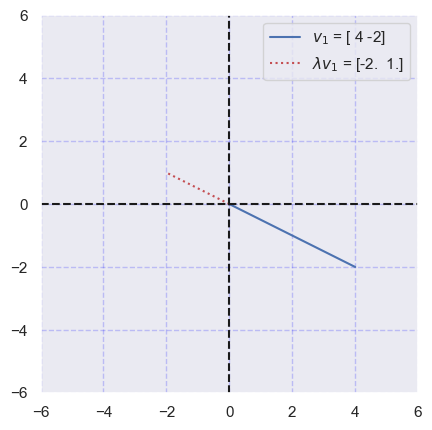

In [23]:
# vector and scalar
v1 = np.array([ 4, -2 ])
l  = -.5
v1m = v1*l # scalar-modulated

# plot them
plt.figure(figsize=(5,5), dpi=100)
sns.set_theme(style='darkgrid')
plt.plot([0, v1[0]],[0, v1[1]],'b',label=f'$v_1$ = {v1}')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label=f'$\lambda v_1$ = {v1m}')

plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid(color='blue', linestyle='--', linewidth=1, alpha=0.2)
plt.plot([-axlim, axlim],[0, 0],'k--')
plt.plot([0, 0],[-axlim, axlim],'k--')
plt.legend()
plt.show();

## Code challenge
Create a 2 4x6 matrices of random numbers.

Use a for loop to compute dot products between corresponding columns.

In [24]:
A = np.round(np.random.randn(4, 6), 2)
B = np.round(np.random.randn(4, 6), 2)

print(f"A:\n{A}", '\n')
print(f"B:\n{B}", '\n')

def dot_product(A, B):
    dps = np.zeros(6)
    for i in range(6):
        dps[i] =  np.dot(A[:, i], B[:, i])

    return np.round(dps, 2)

# Dot product between columns
print(f"Dot product:\n{dot_product(A, B)}")

A:
[[ 0.29  1.24 -0.41  1.74 -0.89  0.05]
 [-0.07 -1.6   0.48 -1.17  0.09 -0.07]
 [ 1.45  0.51  0.69 -0.77  1.69 -1.3 ]
 [ 0.76 -0.86 -0.84  0.44 -0.12 -2.43]] 

B:
[[ 1.67  0.77  0.91  2.2   2.05  0.55]
 [-0.03  0.15  0.01  0.74  1.51  0.29]
 [ 0.37  0.04 -1.72  1.68  2.13  0.16]
 [ 1.69  0.83 -0.75  1.07  0.9  -0.25]] 

Dot product:
[ 2.31  0.02 -0.93  2.14  1.8   0.41]


In [25]:
# Define matrices
m = 4
n = 6
A = np.round(np.random.randn(m, n), 2)
B = np.round(np.random.randn(n, m), 2)

# Function that computes matrix multiplication using for loops
def matrix_multiplication(A, B):
    matrix = np.zeros((4,4))
    for i in range(len(A)):
        for j in range(len(B[i])):
            matrix[i][j] = sum(A[i, :] * B[:, j])

    # matrix = np.array(matrix).reshape(m, m)
    return np.round(matrix, 2)

In [26]:
print(f"A:\n{A}", '\n')
print(f"B:\n{B}", '\n')

# Using for loops to perform matrix multiplication
matrix = matrix_multiplication(A, B)
print(f"Matrix multiplication using for loops:\n{matrix}\n")

A:
[[ 0.09  0.39  1.3   0.36 -2.86 -0.56]
 [-0.71 -0.14  2.39 -2.42  0.2   0.53]
 [-1.21 -0.42 -0.06 -0.73 -0.87  0.59]
 [ 2.02  0.38 -0.96  0.41 -0.22 -0.25]] 

B:
[[-0.84 -1.16  0.48  1.23]
 [ 1.84 -0.6  -0.91  1.39]
 [-2.91 -1.04 -0.03  0.65]
 [-0.48  0.55  1.46 -0.08]
 [ 1.81 -0.75 -0.3  -0.34]
 [ 0.51  0.77  0.47  0.49]] 

Matrix multiplication using for loops:
[[-8.78  0.22  0.77  2.17]
 [-4.82 -2.65 -3.63  0.87]
 [-0.51  2.42 -0.72 -1.47]
 [ 1.07 -1.37  1.2   2.31]]



In [27]:
# Using NumPy to perform matrix multiplication
print("Matrix multiplication using NumPy:")
print(np.round(np.matmul(A, B), 2))

Matrix multiplication using NumPy:
[[-8.78  0.22  0.77  2.17]
 [-4.82 -2.65 -3.63  0.87]
 [-0.51  2.42 -0.72 -1.47]
 [ 1.07 -1.37  1.2   2.31]]
